In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
newyork = pd.read_csv("../../../Data & Script/newyork_offence.csv", skiprows=4, thousands=",")
print(len(newyork))

351


In [2]:
#print(newyork.isna().sum())
# dropping column 4 and 12 because they contain a lot of null values
newyork = newyork.drop(newyork.columns[4], axis=1)
newyork = newyork.drop(newyork.columns[-1], axis=1)
# drop a cell which contains atleast one missing values, 
newyork = newyork.dropna()

In [3]:
# finding highest value from the non outleirs
# outliers = np.where(stats.zscore(newyork['Population']) >= 3)
# non_outliers = np.where(stats.zscore(newyork['Population']) < 3)
# sorted_numbers = np.sort(newyork.loc[non_outliers]['Population'])[::-1]
# sorted_numbers

In [4]:
# replace outlier with the mean
# iteration determines how many times you want to run the replacement
def replace_outliers_with_mean(datax, column, iteration):
    replaced_numbers = set()
    for i in range(iteration):
        outliers = np.where(stats.zscore(datax[column]) >= 3)
        non_outliers = np.where(stats.zscore(datax[column]) < 3)
        the_mean = np.mean(non_outliers)
        if(len(outliers[0]) > 0):
            replaced_numbers.update(outliers[0])
            # sort the numbers in the non_outlier list
            # for each outlier in outliers list
            for o in outliers:
            # replace with the highest number in the non_outlier list
                datax.loc[o,column] = the_mean
    return replaced_numbers

def replace_outliers_with_highest(datax, column, iteration):
    replaced_numbers = set()
    for i in range(iteration):
        outliers = np.where(stats.zscore(datax[column]) >= 3)
        non_outliers = np.where(stats.zscore(datax[column]) < 3)
        if(len(outliers[0]) > 0):
            replaced_numbers.update(outliers[0])
            # sort the numbers in the non_outlier list
            sorted_numbers = np.sort(datax.loc[non_outliers][column])[::-1]
            # for each outlier in outliers list
            for o in outliers:
            # replace with the highest number in the non_outlier list
                datax.loc[o,column] = sorted_numbers[0]
    return replaced_numbers

In [5]:
# see how replacing outliers changes the distribution

# fig = plt.figure(figsize=(6,6))

# fig.add_subplot(231)

# sns.boxplot(newyork['Population'], orient="v")

# outlier1, newyork = replace_outliers(newyork, 'Population')
# fig.add_subplot(232)
# sns.boxplot(newyork['Population'], orient="v")

# outlier2, newyork = replace_outliers(newyork, 'Population')
# fig.add_subplot(233)
# sns.boxplot(newyork['Population'], orient="v")


# print(outlier1)
# print(outlier2)


In [6]:
# myset = set()
# myset.update(np.array([1,2,3]))
# outliers = np.where(stats.zscore(newyork['Population']) >= 3)[0]

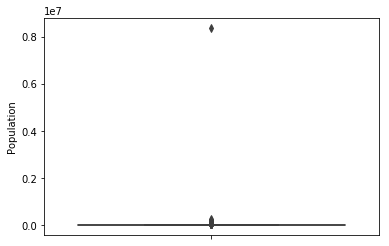

In [7]:
# before outlier removal
sns.boxplot(newyork['Population'], orient="v")

In [8]:
# replace outliers in all collumns with the next highest number
for col in newyork.columns[1:]:
    # print which rows are replaced
    replaced_numbers = replace_outliers_with_mean(newyork, col,1)
    print(replaced_numbers)

{216}
{216}
{216}
{216}
{216}
{216}
{216}
{216, 35}
{216}
{216}


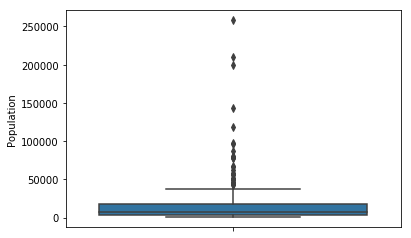

In [9]:
# after oulier removal
sns.boxplot(newyork['Population'], orient="v")

In [10]:
#create the features
newyork['PopSquared'] = newyork['Population'] ** 2
newyork['Murder'] = newyork[newyork.columns[3]] > 0
newyork['Robbery'] = newyork['Robbery'] > 0

- Colinearity
- Correlation with the outcome
- Overfitting as a result of too many variables

Steps to make a regression model

1. Generate potential dependant and independant variables
2. Collect data on variables
3. Check the relationship between each independant and the dependant variable using scatter plots and correlation
4. Check the relationship among independant variables using scatter plots and correlation
5. Conduct linear regression for each IV/DV pair

#### How to interpret correlations

- [0.9, 1.0] very highly correlated
- [0.7, 0.9] highly correlated
- [0.5, 0.7] moderately correlated
- [0.3, 0.5] low correlation
- < 0.3 have little if any (linear) correlation.

In [11]:
# # scatter plot to prove 
# fig = plt.figure(figsize=(16,6))
# fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
# fig.suptitle("Correlation with Property Crime")
# for i,v in enumerate(independant): 
#     ax = fig.add_subplot(220 + i +1)
#     sns.regplot(newyork_selected[v], newyork_selected['Property\ncrime'])
#     sns.despine()
#     ax.set(ylabel='')
# # TGA The shading shows how the values vary for each predicted value

Removing outlier helped. Population, Robbery, Murder, PopSquared are all correlated with the output

In [12]:
newyork.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'PopSquared', 'Murder'],
      dtype='object')

In [13]:
new_column_names = ['city', 'population', 'violent_crime', 'murder_cont', 'rape2', 'robbery',
                   'aggravated_assault', 'property_crime', 'burglary', 
                   'lacrceny_theft', 'motor_vehicle_theft', 'pop_squared', 'murder']
newyork.columns = new_column_names
# rearrange the columns
newyork.columns = new_column_names[:7] + new_column_names[8:] + [new_column_names[7]]

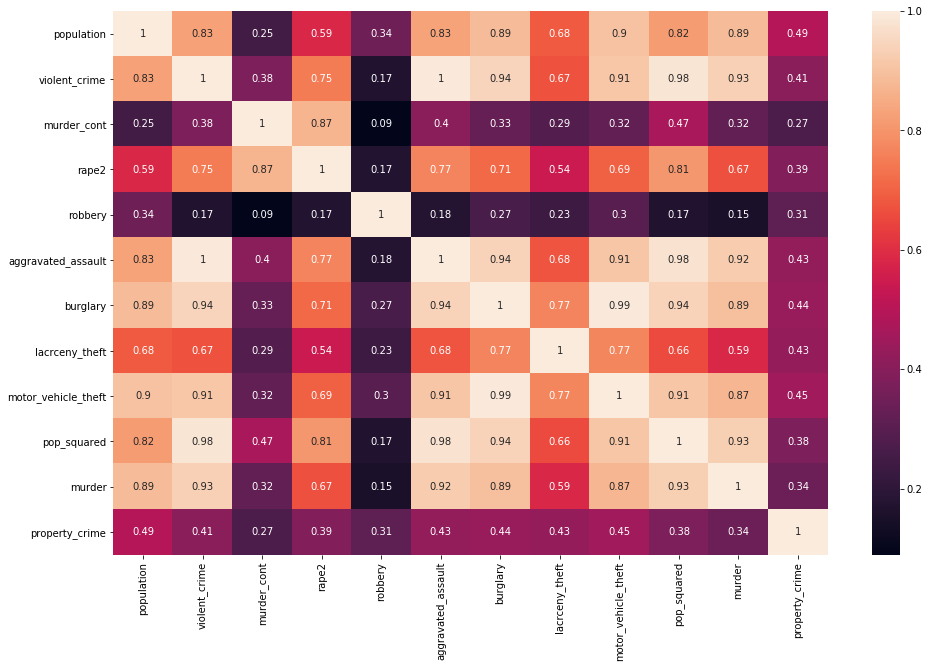

In [14]:
fig = plt.figure(figsize=(16,10))
sns.heatmap(newyork.corr(), annot=True)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = newyork[['population', 'rape2', 'robbery']]
Y = newyork['property_crime']
reg.fit(X,Y)
print(reg.coef_)
print(reg.score(X,Y))

[4.40648766e-06 3.96356220e-03 1.19653110e-01]
0.2843439268401474


In [16]:
import itertools

#good_features = ['population', 'violent_crime', 'aggravated_assault','burglary', 'lacrceny_theft', 'motor_vehicle_theft']

good_features = newyork.columns[1:-1]
# create sqrt of all the features

#for col in newyork.columns[1:-1]:
#    newyork['sqrt_' + col] = newyork[col] ** (1/2)

#good_features = list(newyork.columns[1:12]) + list(newyork.columns[12:])
print(len(good_features))
scores = dict()
for L in range(0, len(good_features)+1):
    for subset in itertools.combinations(good_features, L):
        if(len(subset) > 0):
            X =  newyork[list(subset)]
            Y =  newyork['property_crime']
            reg.fit(X,Y)
            scores[str(subset)] = reg.score(X, Y)

11


In [17]:
sorted_by_value = sorted(scores.items(), key=lambda kv: kv[1])
sorted_by_value.reverse()
sorted_by_value[:20]

[("('population', 'violent_crime', 'murder_cont', 'rape2', 'robbery', 'aggravated_assault', 'burglary', 'lacrceny_theft', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.41659694523497703),
 ("('population', 'violent_crime', 'murder_cont', 'robbery', 'aggravated_assault', 'burglary', 'lacrceny_theft', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.4159733792290847),
 ("('population', 'violent_crime', 'murder_cont', 'rape2', 'robbery', 'aggravated_assault', 'burglary', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.41558819676931935),
 ("('population', 'violent_crime', 'murder_cont', 'rape2', 'robbery', 'burglary', 'lacrceny_theft', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.41558407284584326),
 ("('population', 'violent_crime', 'murder_cont', 'robbery', 'aggravated_assault', 'burglary', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.4153052971513783),
 ("('population', 'violent_crime', 'murder_cont', 'rape2', 'robbery', 'burglary', 'motor_vehicle_t

from the above, the best 5 features seem to be this ones

next let me try to find the sqrt of each and find the best combination

In [18]:
good_features = ['population', 'violent_crime', 'murder_cont','murder', 'pop_squared']
sqrt_features = ['sqrt_'+ c for c in good_features[:-1]]

# sqrt is not applied to pop_squared because it will create duplicate feature, population
for col in good_features[:-1]:
    newyork['sqrt_' + col] = newyork[col] ** (1/2)

good_features = good_features + sqrt_features

scores = dict()
for L in range(0, len(good_features)+1):
    for subset in itertools.combinations(good_features, L):
        if(len(subset) > 0):
            X =  newyork[list(subset)]
            Y =  newyork['property_crime']
            reg.fit(X,Y)
            scores[str(subset)] = reg.score(X, Y)

In [19]:
sorted_by_value = sorted(scores.items(), key=lambda kv: kv[1])
sorted_by_value.reverse()
sorted_by_value[:30]

[("('population', 'violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont')",
  0.9009487064707853),
 ("('population', 'violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont', 'sqrt_murder')",
  0.9009487064707851),
 ("('violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont', 'sqrt_murder')",
  0.9009487064707259),
 ("('population', 'violent_crime', 'murder_cont', 'murder', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont', 'sqrt_murder')",
  0.8994074759176445),
 ("('population', 'violent_crime', 'murder_cont', 'murder', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont')",
  0.8994074759176443),
 ("('violent_crime', 'murder_cont', 'murder', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont', 'sqrt_murder')",
  0.8994074759176056),
 ("('population', 'violent_crime', 'murder_cont

The following features are good ones, because the Rsquared is 0.9

[("('population', 'violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont')",